In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [16]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    return pd.read_csv("datasets/csv_result-dataset_31_credit-g.csv")

In [18]:
housing = load_housing_data()
housing.head()

,id,'checking_status','duration','credit_history','purpose','credit_amount','savings_status','employment','installment_commitment','personal_status',...,'property_magnitude','age','other_payment_plans','housing','existing_credits','job','num_dependents','own_telephone','foreign_worker','class'
0,1,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [19]:

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1000 non-null   int64 
 1   'checking_status'         1000 non-null   object
 2   'duration'                1000 non-null   int64 
 3   'credit_history'          1000 non-null   object
 4   'purpose'                 1000 non-null   object
 5   'credit_amount'           1000 non-null   int64 
 6   'savings_status'          1000 non-null   object
 7   'employment'              1000 non-null   object
 8   'installment_commitment'  1000 non-null   int64 
 9   'personal_status'         1000 non-null   object
 10  'other_parties'           1000 non-null   object
 11  'residence_since'         1000 non-null   int64 
 12  'property_magnitude'      1000 non-null   object
 13  'age'                     1000 non-null   int64 
 14  'other_payment_plans'    

In [21]:
housing.describe()

,id,'duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents'
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,288.819436,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,1.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,250.750000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,500.500000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,750.250000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1000.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


Saving figure attribute_histogram_plots


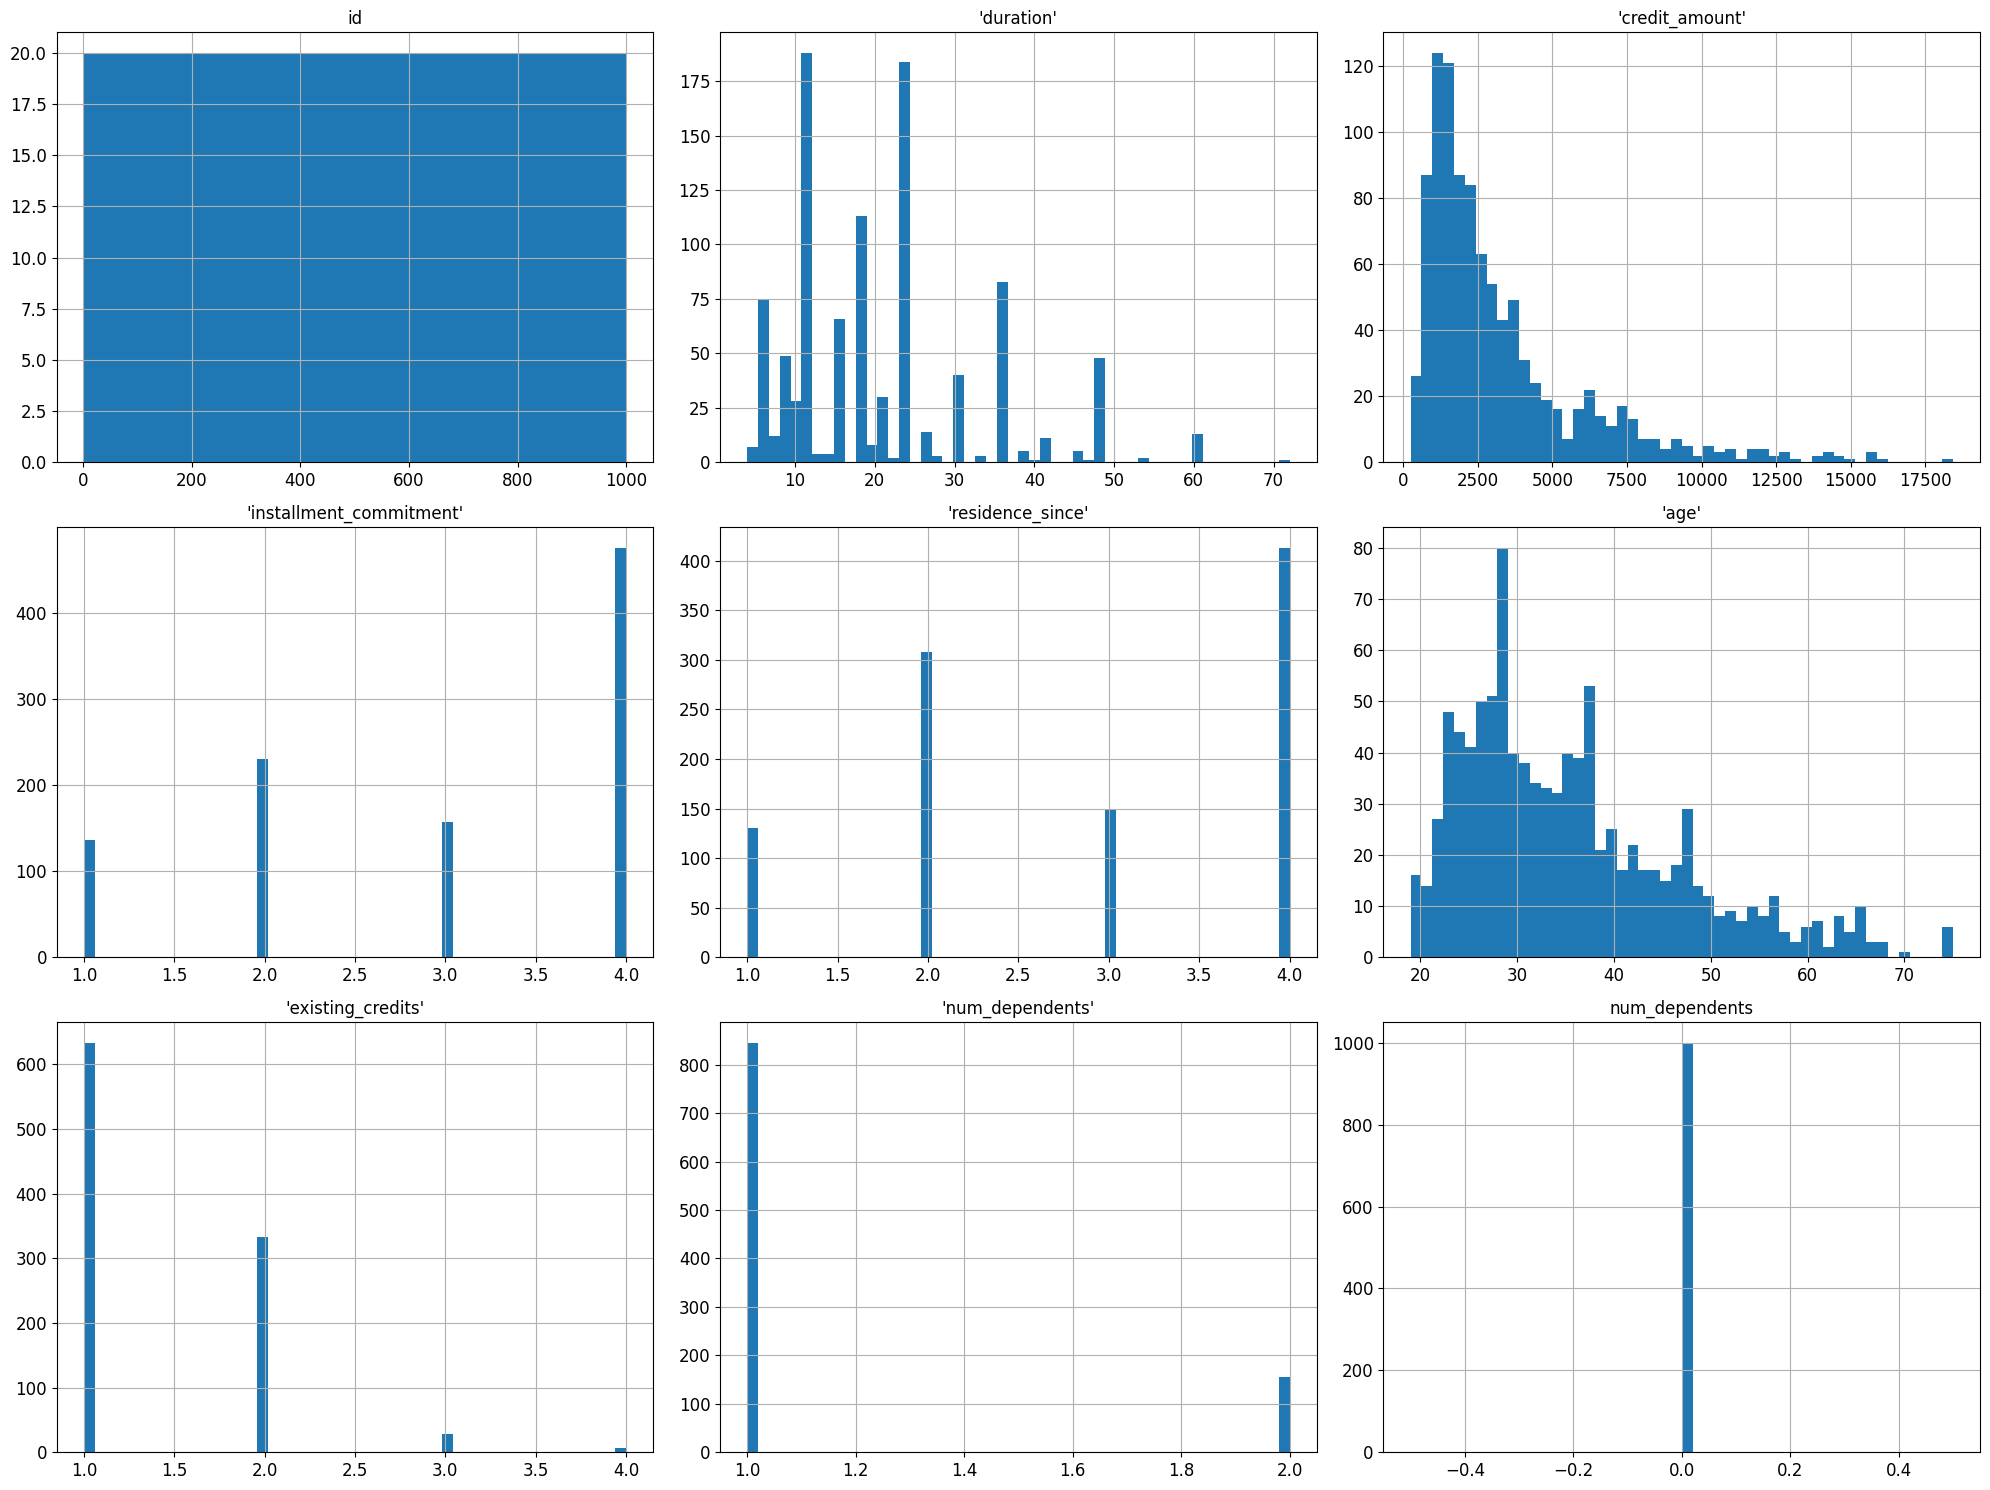

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [23]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [24]:

import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [25]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

800

In [26]:
len(test_set)

200

In [27]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [28]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [29]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [30]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [41]:
housing_with_id["id"] = housing["'num_dependents'"] * 1000 + housing["'duration'"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [42]:
test_set.head()

,index,id,'checking_status','duration','credit_history','purpose','credit_amount','savings_status','employment','installment_commitment',...,'property_magnitude','age','other_payment_plans','housing','existing_credits','job','num_dependents','own_telephone','foreign_worker','class'
0,0,1006,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,1,1048,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,...,real estate,22,none,own,1,skilled,1,none,yes,bad
4,4,2024,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
5,5,2036,no checking,36,existing paid,education,9055,no known savings,1<=X<4,2,...,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good
9,9,1030,0<=X<200,30,critical/other existing credit,new car,5234,<100,unemployed,4,...,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,bad


In [43]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [44]:

test_set.head()

,id,'checking_status','duration','credit_history','purpose','credit_amount','savings_status','employment','installment_commitment','personal_status',...,'age','other_payment_plans','housing','existing_credits','job','num_dependents','own_telephone','foreign_worker','class',num_dependents
521,522,<0,18,existing paid,radio/tv,3190,<100,1<=X<4,2,female div/dep/mar,...,24,none,own,1,skilled,1,none,yes,bad,0
737,738,<0,18,existing paid,new car,4380,100<=X<500,1<=X<4,3,male single,...,35,none,own,1,unskilled resident,2,yes,yes,good,0
740,741,<0,24,all paid,new car,2325,100<=X<500,4<=X<7,2,male single,...,32,bank,own,1,skilled,1,none,yes,good,0
660,661,>=200,12,existing paid,radio/tv,1297,<100,1<=X<4,3,male mar/wid,...,23,none,rent,1,skilled,1,none,yes,good,0
411,412,no checking,33,critical/other existing credit,used car,7253,<100,4<=X<7,3,male single,...,35,none,own,2,high qualif/self emp/mgmt,1,yes,yes,good,0


Saving figure bad_visualization_plot


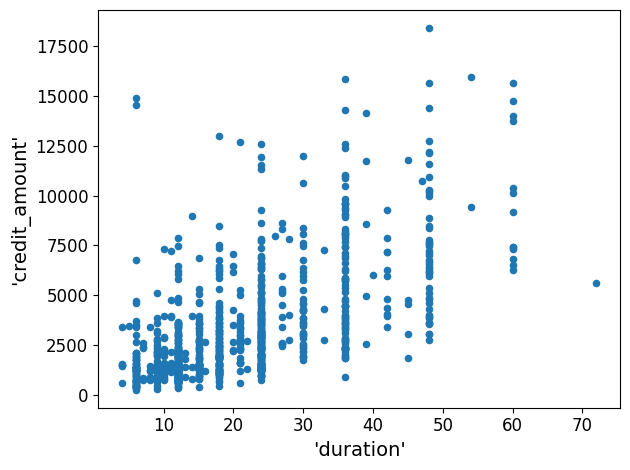

In [50]:
housing.plot(kind="scatter", x="'duration'", y="'credit_amount'")
save_fig("bad_visualization_plot")

In [57]:
eer = housing.describe()
corr_matrix = eer.corr()


In [58]:
corr_matrix["'duration'"].sort_values(ascending=False)

'duration'                  1.000000
'age'                       0.999816
'existing_credits'          0.998360
'residence_since'           0.998325
'installment_commitment'    0.998324
'num_dependents'            0.998253
num_dependents              0.998188
id                          0.564278
'credit_amount'            -0.159641
Name: 'duration', dtype: float64

In [56]:
housing.describe()

,id,'duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents',num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,500.500000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.0
std,288.819436,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.0
min,1.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.0
25%,250.750000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.0
50%,500.500000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.0
75%,750.250000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,0.0
max,1000.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,0.0
